In [1]:
from torchvision import datasets

cifar10 = datasets.CIFAR10("../", train=True, download=True)
cifar10_val = datasets.CIFAR10("../", train=False, download=True)

In [2]:
help(datasets.CIFAR10)

Help on class CIFAR10 in module torchvision.datasets.cifar:

class CIFAR10(torchvision.datasets.vision.VisionDataset)
 |  CIFAR10(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |
 |  `CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.
 |
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where directory
 |          ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
 |      train (bool, optional): If True, creates dataset from training set, otherwise
 |          creates from test set.
 |      transform (callable, optional): A function/transform that takes in a PIL image
 |          and returns a transformed version. E.g, ``transforms.RandomCrop``
 |      target_transform (callable, optional): A function/transform that takes in the
 |          target and transforms it.
 |      download (bool, optional):

In [3]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [4]:
len(cifar10)

50000

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [6]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

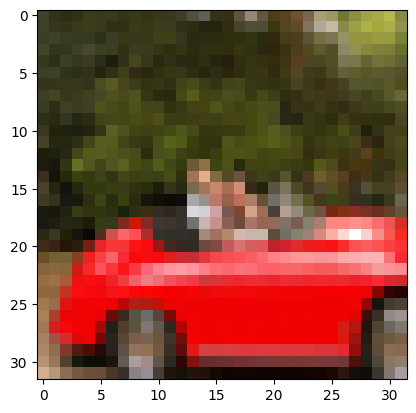

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [8]:
from torchvision import transforms

dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [9]:
tensor_cifar10 = datasets.CIFAR10("../", train=True, download=False,
                                  transform=transforms.ToTensor())

In [10]:
img_t, _ = tensor_cifar10[99]
img_t.dtype, img_t.shape

(torch.float32, torch.Size([3, 32, 32]))

In [11]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

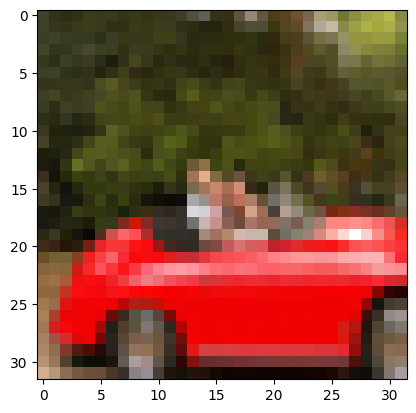

In [12]:
plt.imshow(img_t.permute(1, 2, 0))

In [13]:
import torch

A = torch.arange(0, 12).reshape(4, 3)

A.shape

torch.Size([4, 3])

In [14]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [15]:


imgs.shape

torch.Size([3, 32, 32, 50000])

In [16]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [17]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [18]:
transformed_cifar10 = datasets.CIFAR10("../", train=True, download=False,
                                       transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=(0.4915, 0.4823, 0.4468),
                                                                std=(0.2470, 0.2435, 0.2616))
                                       ]))
transformed_cifar10_val = datasets.CIFAR10("../", train=False, download=False,
                                           transform=transforms.Compose([
                                            transforms.ToTensor()                                               
                                           ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9806982..2.126078].


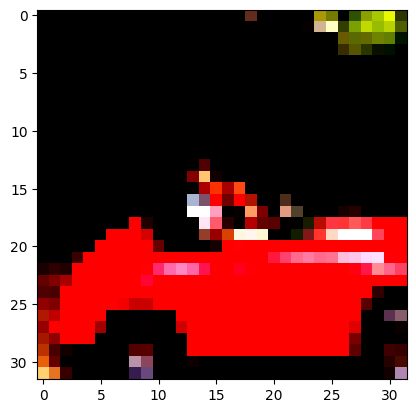

In [19]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))

In [20]:
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]
cifar2 = [(img, label_map[label])
          for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in transformed_cifar10_val if label in [0, 2]]

In [21]:
import torch.nn as nn
from collections import OrderedDict

n_out = 2

model = nn.Sequential(
    OrderedDict([
        ("fc1", nn.Linear(in_features=3072, out_features=512)),
        ("tanh", nn.Tanh()),
        ("fc2", nn.Linear(512, n_out))
    ])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8628641..2.029448].


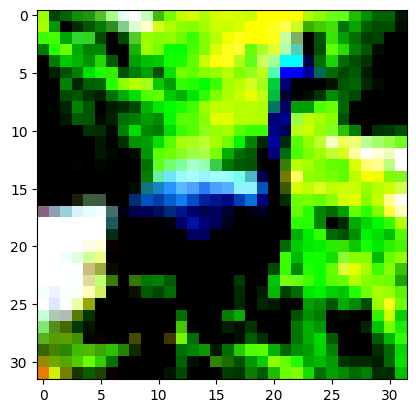

In [22]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [23]:
img.shape

torch.Size([3, 32, 32])

In [24]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [25]:
out = model(img_batch)
out

tensor([[-0.3391, -0.0934]], grad_fn=<AddmmBackward0>)

In [26]:
import torch
_, index = torch.max(out, dim=1)
index

tensor([1])

In [27]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
)
loss = nn.CrossEntropyLoss()

In [28]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.7520, grad_fn=<NllLossBackward0>)

In [29]:
nn.CrossEntropyLoss()

CrossEntropyLoss()

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim


model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

n_epochs = 5

for epoch in range(n_epochs):
    for img, label in cifar2:
        optimizer.zero_grad()
        out = model(img.view(-1).unsqueeze(0))
        loss = criterion(out, torch.tensor([label]))

        loss.backward()
        optimizer.step()
        
    print(f"Epoch: {epoch}, Loss {float(loss)}")

Epoch: 0, Loss 6.492502689361572
Epoch: 1, Loss 2.2003977298736572
Epoch: 2, Loss 1.9473179578781128
Epoch: 3, Loss 2.4837019443511963
Epoch: 4, Loss 5.643917560577393


In [31]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# device = torch.device("cpu")
print(device)

mps


In [32]:
from torch.utils.data import DataLoader


train_loader = DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
).to(device)

lr = 1e-2
optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        optimizer.zero_grad()
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1).to(device))
        loss = criterion(outputs, labels.to(device))

        loss.backward()
        optimizer.step()
        
    print(f"Epoch: {epoch}, Loss {float(loss)}")

Epoch: 0, Loss 0.32965677976608276
Epoch: 1, Loss 0.3370841145515442
Epoch: 2, Loss 0.4352153539657593
Epoch: 3, Loss 0.24158453941345215
Epoch: 4, Loss 0.35769280791282654
Epoch: 5, Loss 0.45000845193862915
Epoch: 6, Loss 0.4502984285354614
Epoch: 7, Loss 0.38442033529281616
Epoch: 8, Loss 0.25918692350387573
Epoch: 9, Loss 0.2384536862373352
Epoch: 10, Loss 0.24110369384288788
Epoch: 11, Loss 0.3369191884994507
Epoch: 12, Loss 0.3728094696998596
Epoch: 13, Loss 0.4137114882469177
Epoch: 14, Loss 0.25002264976501465
Epoch: 15, Loss 0.22865761816501617
Epoch: 16, Loss 0.3887284994125366
Epoch: 17, Loss 0.4494500458240509
Epoch: 18, Loss 0.1784142553806305
Epoch: 19, Loss 0.22830449044704437
Epoch: 20, Loss 0.23501186072826385
Epoch: 21, Loss 0.20343433320522308
Epoch: 22, Loss 0.35672247409820557
Epoch: 23, Loss 0.12574294209480286
Epoch: 24, Loss 0.22919175028800964
Epoch: 25, Loss 0.40607866644859314
Epoch: 26, Loss 0.1250978410243988
Epoch: 27, Loss 0.2575172781944275
Epoch: 28, Los

In [33]:
val_loader = DataLoader(cifar2_val, batch_size=64, shuffle=False, num_workers=10)

correct = 0
total = 0

model.eval()
with torch.no_grad():
    for imgs, labels in val_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        batch_size = imgs.shape[0]
        print(batch_size)
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        print(labels.shape[0], "\n\n")
        correct += (predicted == labels).sum().item()
print(f"Accuracy: {correct / total}")

64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


64
64 


16
16 


Accuracy: 0.552


In [34]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]

sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [35]:
import torch.nn as nn
conv = nn.Conv2d(3, 16, kernel_size=4)
conv

Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))

In [36]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 4, 4]), torch.Size([16]))

In [37]:
help(nn.Conv2d)

Help on class Conv2d in module torch.nn.modules.conv:

class Conv2d(_ConvNd)
 |  Conv2d(in_channels: int, out_channels: int, kernel_size: Union[int, tuple[int, int]], stride: Union[int, tuple[int, int]] = 1, padding: Union[str, int, tuple[int, int]] = 0, dilation: Union[int, tuple[int, int]] = 1, groups: int = 1, bias: bool = True, padding_mode: str = 'zeros', device=None, dtype=None) -> None
 |
 |  Applies a 2D convolution over an input signal composed of several input
 |  planes.
 |
 |  In the simplest case, the output value of the layer with input size
 |  :math:`(N, C_{\text{in}}, H, W)` and output :math:`(N, C_{\text{out}}, H_{\text{out}}, W_{\text{out}})`
 |  can be precisely described as:
 |
 |  .. math::
 |      \text{out}(N_i, C_{\text{out}_j}) = \text{bias}(C_{\text{out}_j}) +
 |      \sum_{k = 0}^{C_{\text{in}} - 1} \text{weight}(C_{\text{out}_j}, k) \star \text{input}(N_i, k)
 |
 |
 |  where :math:`\star` is the valid 2D `cross-correlation`_ operator,
 |  :math:`N` is a bat

In [38]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 29, 29]))

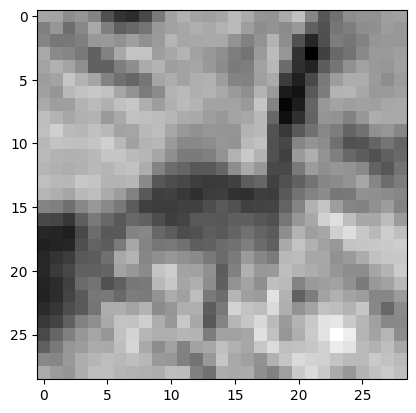

In [39]:
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.show()

In [40]:
output.shape

torch.Size([1, 16, 29, 29])

In [42]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))